In [18]:
from plot import *
from gen import *
from load_data import *  
from func_tools import *
from AGM import *
from GM import *
from BFGS import *
from LBFGS import *
from Newton_CG import *
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'})

## Load Real Data

In [61]:
# points,wine_label = load_wine_dense()
points,vowel_label = load_vowel_dense()

In [62]:
print(vowel_label)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [ 0]
 [ 1

In [20]:
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

## AGM

In [63]:
lbd = 0.4
delta = 1e-2
n = len(points)
step = step_size(n,lbd,delta)
grad = lambda X,B,D: grad_hub_matrix(X,delta,points,lbd,B,D)

In [64]:
ans,AGM_loss = AGM(grad,points,step,0.001)

Iter: 1
norm(gX): 3326.6337375669364
Iter: 2
norm(gX): 3326.3331463577947
Iter: 3
norm(gX): 3325.9457845491797
Iter: 4
norm(gX): 3325.472187108266
Iter: 5
norm(gX): 3324.911659528661
Iter: 6
norm(gX): 3324.262644658053
Iter: 7
norm(gX): 3323.522837949581
Iter: 8
norm(gX): 3322.689200011224
Iter: 9
norm(gX): 3321.7579107188426
Iter: 10
norm(gX): 3320.724278691717
Iter: 11
norm(gX): 3319.582607744929
Iter: 12
norm(gX): 3318.3260151029576
Iter: 13
norm(gX): 3316.946190603703
Iter: 14
norm(gX): 3315.4330800280995
Iter: 15
norm(gX): 3313.774467763275
Iter: 16
norm(gX): 3311.9554227993012
Iter: 17
norm(gX): 3309.9575554958287
Iter: 18
norm(gX): 3307.758007333809
Iter: 19
norm(gX): 3305.328056465662
Iter: 20
norm(gX): 3302.6311587246596
Iter: 21
norm(gX): 3299.62013971851
Iter: 22
norm(gX): 3296.2330769589817
Iter: 23
norm(gX): 3292.387100498715
Iter: 24
norm(gX): 3287.9687731428126
Iter: 25
norm(gX): 3282.818626368301
Iter: 26
norm(gX): 3276.70523675162
Iter: 27
norm(gX): 3269.2794730863957


In [65]:
y_pred = auto_group(ans,10)

In [66]:
purity_score(vowel_label, y_pred)

0.19318181818181818

In [50]:
groups = get_group(ans, tol=0.0001)
groups

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,
        0,  0,  0,  0,  0,  0,  0,  0,  3,  4,  4,  0,  5,  0,  6,  7,  0,
        4,  8,  9, 10, 11, 12, 13, 14,  0, 15, 16, 17,  0,  0,  0,  4,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  5, 18, 19,  0,  5, 20,  0,  0,
        0,  0,  0, 21,  0,  0,  0,  0, 22,  0, 23,  0,  0, 24,  0,  0, 25,
        0,  0, 26, 17, 27, 28,  0,  0, 29,  0,  0,  4,  4,  4,  4,  4,  4,
       30, 31,  4,  4,  4,  4,  4,  4,  4,  4, 32,  4,  4,  4,  4,  4, 33,
        4,  4,  4,  4, 34, 35, 35,  4,  4,  4,  4,  4,  4,  4,  4,  4, 36,
        4,  4,  4,  4,  4,  4,  4,  4])

In [51]:
len(AGM_loss)

74

## GM

In [57]:
lbd = 0.05
delta = 1e-3
func = lambda X,B: loss_func(X,points,lbd,delta,B)
grad = lambda X,B,D: grad_hub_matrix(X,delta,points,lbd,B,D)
ans2,GM_loss = GM(points,func,grad,0.005)

Iter: 1
norm(gX): 90.70565123072659
step size: 0.25
Iter: 2
norm(gX): 75.82524116256265
step size: 0.0625
Iter: 3
norm(gX): 88.07652281806934
step size: 0.0625
Iter: 4
norm(gX): 69.38714759021633
step size: 0.03125
Iter: 5
norm(gX): 66.76824883390998
step size: 0.015625
Iter: 6
norm(gX): 85.42534358152321
step size: 0.00390625
Iter: 7
norm(gX): 72.77928258063129
step size: 0.001953125
Iter: 8
norm(gX): 64.6119560210716
step size: 0.0009765625
Iter: 9
norm(gX): 82.885538057335
step size: 0.00048828125
Iter: 10
norm(gX): 4.749882004043084
step size: 0.0001220703125
Iter: 11
norm(gX): 0.41109208262512953
step size: 0.0001220703125
Iter: 12
norm(gX): 0.03557913654544502
step size: 0.0001220703125
Iter: 13
norm(gX): 0.0030792978284330066
step size: 0.0001220703125


In [60]:
y_pred = auto_group(ans,3)
purity_score(wine_label, y_pred)

0.398876404494382

In [59]:
groups

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177])

Text(0.5,0,'Iters')

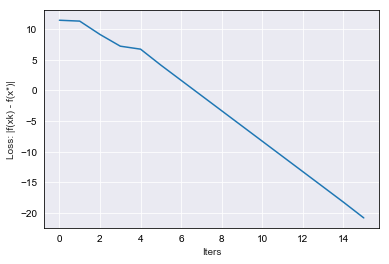

In [57]:
plt.plot(np.log(GM_loss - GM_loss[len(GM_loss)-1]))
plt.ylabel("Loss: |f(xk) - f(x*)|")
plt.xlabel("Iters")

## GM_BB

In [ ]:
lbd = 0.4
delta = 1e-2
func = lambda X,B: loss_func(X,points,lbd,delta,B)
grad = lambda X,B,D: grad_hub_matrix(X,delta,points,lbd,B,D)
ans_BB,GM_BB_loss = GM_BB(points,func,grad,0.005)

In [19]:
groups = get_group(ans_BB, tol=0.0001)

In [20]:
groups

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,
        0,  0,  0,  0,  0,  0,  0,  0,  3,  4,  4,  0,  5,  0,  6,  7,  0,
        4,  8,  9, 10, 11, 12, 13, 14,  0, 15, 16, 17,  0,  0,  0,  4,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  5, 18, 19,  0,  5, 20,  0,  0,
        0,  0,  0, 21,  0,  0,  0,  0, 22,  0, 23,  0,  0, 24,  0,  0, 25,
        0,  0, 26, 17, 27, 28,  0,  0, 29,  0,  0,  4,  4,  4,  4,  4,  4,
       30, 31,  4,  4,  4,  4,  4,  4,  4,  4, 32,  4,  4,  4,  4,  4, 33,
        4,  4,  4,  4, 34, 35, 35,  4,  4,  4,  4,  4,  4,  4,  4,  4, 36,
        4,  4,  4,  4,  4,  4,  4,  4])

In [34]:
plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'})

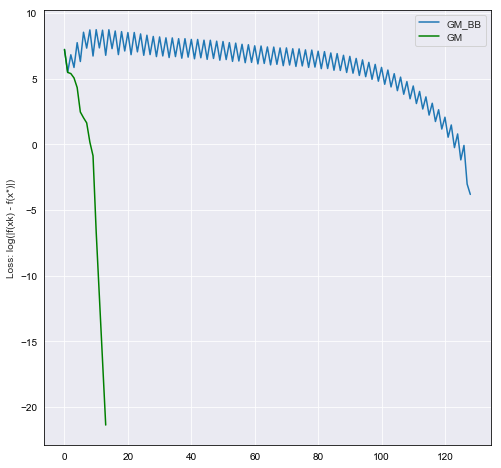

In [35]:
plt.figure(figsize=(8,8))
plt.ylabel("Loss: log(|f(xk) - f(x*)|)")
plt.plot(np.log(GM_BB_loss - GM_BB_loss[len(GM_BB_loss)-1]),label="GM_BB")
plt.plot(np.log(GM_loss - GM_loss[len(GM_loss)-1]),color="green",label="GM")
plt.legend()
plt.savefig("D:\Study\MDS\Term 1\Optimization\Final\Figure\BB_GM_wine_Loss")
plt.show()

## BFGS

In [6]:
lbd = 0.4
delta = 1e-2
func = lambda X,B: loss_func(X,points,lbd,delta,B)
grad = lambda X,B,D: grad_hub_matrix(X,delta,points,lbd,B,D)
ans_BFGS,BFGS_loss = BFGS(points,func,grad,0.005)

nomr_2: 3409.614057455152
s.T.dot(y): 347970.8528134625
nomr_2: 3358.310458762493
s.T.dot(y): 6350.5729612928935
nomr_2: 3298.695041718549
s.T.dot(y): 19240.73965117557
nomr_2: 3229.0713238127155
s.T.dot(y): 26137.404990852054
nomr_2: 3192.1622113632484
s.T.dot(y): 53268.43165918809
nomr_2: 3236.699584512369
s.T.dot(y): 32846.53005118518
nomr_2: 3306.898928174246
s.T.dot(y): 29078.833767163924
nomr_2: 3319.624642834236
s.T.dot(y): 11159.251595297124
nomr_2: 3321.935048852779
s.T.dot(y): 4208.259881328617
nomr_2: 3322.0616238366456


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(5,5))
plt.ylabel("Loss")
plt.plot(np.log(BFGS_loss - BFGS_loss[len(BFGS_loss)-1]))
plt.show()

## L-BFGS

In [7]:
lbd = 0.4
delta = 1e-2
func = lambda X,B: loss_func(X,points,lbd,delta,B)
grad = lambda X,B,D: grad_hub_matrix(X,delta,points,lbd,B,D)
ans_LBFGS,LBFGS_loss = LBFGS(points,func,grad,0.005,1,5)

alpha: 0.5
alpha: 0.25
alpha: 0.125
alpha: 0.0625
alpha: 0.03125
alpha: 0.015625
step_size: 0.015625
s.T.dot(y): 347970.8528134626
Iter: 0
norm_2:  3409.614057455152
step_size: 1
s.T.dot(y): 170892.7663187714
Iter: 1
norm_2:  3338.902753529945
alpha: 0.5
alpha: 0.25
step_size: 0.25
s.T.dot(y): 459.9772029469722
Iter: 2
norm_2:  3340.1044716065962
step_size: 1
s.T.dot(y): 8.936968024084448
Iter: 3
norm_2:  3343.0228692284213
step_size: 1
s.T.dot(y): 2.3683153758941327
Iter: 4
norm_2:  3343.5296423214886
step_size: 1
s.T.dot(y): 0.05209840790903458
Iter: 5
norm_2:  3343.448457942795
alpha: 0.5
alpha: 0.25
step_size: 0.25
s.T.dot(y): 21219.165743271868
Iter: 6
norm_2:  3374.713222198654
alpha: 0.5
step_size: 0.5
s.T.dot(y): 241.05943626768607
Iter: 7
norm_2:  3390.0408106573327
step_size: 1
s.T.dot(y): 8.59717694036091
Iter: 8
norm_2:  3397.0341975050046
step_size: 1
s.T.dot(y): 3.2804520993523094
Iter: 9
norm_2:  3397.1676112918544
step_size: 1
s.T.dot(y): 0.4098928851629522
Iter: 10
nor

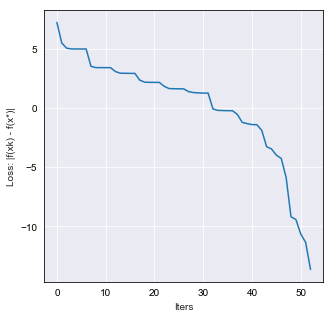

In [7]:
plt.figure(figsize=(5,5))
plt.ylabel("Loss")
plt.plot(np.log(LBFGS_loss - LBFGS_loss[len(LBFGS_loss)-1]))
plt.ylabel("Loss: |f(xk) - f(x*)|")
plt.xlabel("Iters")
plt.show()

## Newton-CG

In [14]:
points,wine_label = load_vowel()

In [15]:
lbd = 0.4
delta = 1e-2
cg_max = 10
tol = 0.005
cg_tol_k = 0.001 # 可以使用同样的tol
alpha0 = 1
gamma = 0.01
sigma = 0.5

points = points.toarray().T
n = points.shape[0]
d = points.shape[1]
B = gen_B(n,sparse=False)
func = lambda X, B: loss_func(X,points,lbd,delta,B)
h_obj = OBJ(d, n, delta)
grad = lambda X: grad_hub_matrix(X,delta,points,lbd,B,B.T)
HessianP = lambda X: h_obj.hessiant(X.T, h_obj.grad(X.T, points.T, lbd).reshape((d,n)), lbd)
bck = lambda X, gk, dk: backtrack(X, func, gk, dk,B,alpha0,gamma,sigma)

In [16]:
ans3, CG_loss = NewtonCG(grad, HessianP, bck, np.zeros_like(points), cg_max, cg_tol_k, tol,func)

MemoryError: 

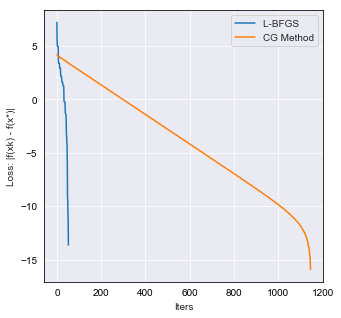

In [14]:
plt.figure(figsize=(5,5))
plt.ylabel("Loss")
plt.plot(np.log(LBFGS_loss - LBFGS_loss[len(LBFGS_loss)-1]),label="L-BFGS ")
plt.plot(np.log(CG_loss - CG_loss[len(CG_loss)-1]),label="CG Method")
plt.ylabel("Loss: |f(xk) - f(x*)|")
plt.xlabel("Iters")
plt.legend()
plt.savefig("D:\Study\MDS\Term 1\Optimization\Final\Figure\Real_data_CG_LBFGS_Loss")
plt.show()